In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as k
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Load MNIST dataset
#MNIST = k.datasets.fashion_mnist.load_data()
MNIST = k.datasets.mnist.load_data()
# Seperate dataset
training = MNIST[0]
X_train = training[0]
y_train = pd.Series(training[1], name="training targets")
testing = MNIST[1]
X_test = testing[0]
y_test = pd.Series(testing[1], name="testing targets")
# Keep only 1s and 0s for binary classification problem
y_train = y_train[(y_train == 0) | (y_train == 1)]
X_train = X_train[y_train.index]
y_test = y_test[(y_test == 0) | (y_test == 1)]
X_test = X_test[y_test.index]

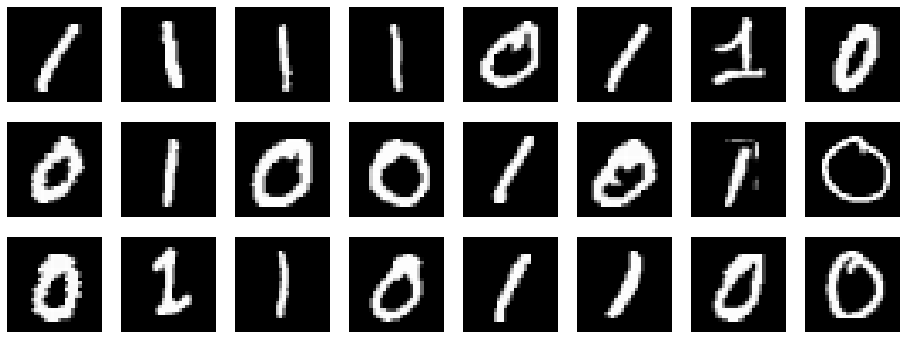

In [3]:
# Visualize training data
plt.figure(figsize=(16,6))
for i in range(24):
    fig = plt.subplot(3, 8, i+1)
    fig.set_axis_off()
    plt.imshow(X_train[i+1], cmap='gray')

# Keras Model

In [4]:
initializer = "random_normal" # random_normal or glorot_uniform
keras_model = k.Sequential([ 
    k.layers.InputLayer(input_shape=(28,28,1)),
    k.layers.Conv2D(filters=16, kernel_size=3, activation="relu", kernel_initializer=initializer),
    k.layers.Flatten(),
    k.layers.Dense(32, activation="relu", kernel_initializer=initializer),
    k.layers.Dense(1, activation="sigmoid", kernel_initializer=initializer)
])
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                346144    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 346,337
Trainable params: 346,337
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Select only m samples for fast training time during debugging
m = 1000
X = X_train[:m, :, :].reshape((m, 28, 28, 1))
y = y_train[:m].values.reshape(1,m)
# Compile model
keras_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss='binary_crossentropy')
# Train model
history = keras_model.fit(x=X, y=y.flatten(), epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9317
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1456
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0680
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0569
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0500
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0378
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0356


In [6]:
m = 1000
X = X_test[:m, :, :].reshape((m, 28, 28, 1))
y = y_test[:m].values.reshape(1,m)

predictions = keras_model.predict_classes(X)
accuracy_score(predictions, y.flatten())

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.99

# Custom CNN

In [62]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.
    Arguments:
    Z -- Output of the linear layer, of any shape
    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    #print(AL)
    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    logprods = np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T)
    cost = -1/m*np.sum(logprods)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    #print(cost)
    return cost

In [179]:
class Layer:
    """
    Interface for layers.
    """
    def __init__(self, input_shape: tuple, output_shape: tuple, trainable=True):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.trainable = trainable
        
    def forward(self, A_prev):
        pass
    
    def backward(self, dZ):
        pass
    
    def update_params(self, learning_rate):
        pass
    
    def __str__(self):
        return self.__class__.__name__ + " " + str(self.output_shape)
    
    
class Dense(Layer):
    def __init__(self, neurons: int, input_shape: tuple, activation: str):
        """
        Constructor for Conv2D layer.
        
        Arguments:
        neurons (N) -- number of neurons
        input_shape -- (N_prev, m)
        activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
        """
        output_shape = (neurons, input_shape[1])
        super().__init__(input_shape, output_shape)
        self.neurons = neurons
        self.activation = activation
        self.initialize_params()
        
    def initialize_params(self):
        '''
        Definitions:
        self.W -- Weights, numpy array of shape (N, N_prev)
        self.b -- Biases, numpy array of shape (N, 1)
        '''
        self.W = np.random.randn(self.neurons, self.input_shape[0]) * 0.01
        self.b = np.zeros((self.neurons,1))
        
        
    def forward(self, A_prev):
        """
        Implement the forward propagation for the dense layer with activation function

        Arguments:
        A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)

        Returns:
        A -- the output of the activation function, also called the post-activation value 
        
        Defintions:
        self.cache -- tuple of values (A_prev, activation_cache) stored for computing backward propagation efficiently

        """
        Z = np.dot(self.W, A_prev) + self.b
        if self.activation == "sigmoid":
            A, activation_cache = sigmoid(Z)

        elif self.activation == "relu":
            A, activation_cache = relu(Z)

        assert (A.shape == (self.W.shape[0], A_prev.shape[1]))
        self.cache = (A_prev, activation_cache)

        return A
    
    def backward(self, dA):
        """
        Implement the backward propagation for the dense layer with activation function

        Arguments:
        dA -- post-activation gradient for current layer l 
       
        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        
        Definitions:
        self.dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        self.db -- Gradient of the cost with respect to b (current layer l), same shape as b
        """
        A_prev, activation_cache = self.cache
        m = A_prev.shape[1]

        if self.activation == "relu":
            dZ = relu_backward(dA, activation_cache)
        elif self.activation == "sigmoid":
            dZ = sigmoid_backward(dA, activation_cache)
            
        self.dW = 1/m*np.dot(dZ, A_prev.T)
        self.db = 1/m*np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        return dA_prev
    
    def update_params(self, learning_rate):
        self.W = self.W-learning_rate*self.dW
        self.b = self.b-learning_rate*self.db

        
class Conv2D(Layer):
    def __init__(self, filters: int, filter_size: int, input_shape: tuple, padding="VALID", stride=1):
        """
        Constructor for Conv2D layer.
        
        Arguments:
        filters (C) -- number of filters
        filter_size (f) -- size of filters
        input_shape -- (m, H, W, C)
        """
        output_shape = (input_shape[0], input_shape[1] - filter_size + 1, input_shape[2] - filter_size + 1, filters)
        super().__init__(input_shape, output_shape)
        self.filters = filters
        self.filter_size = filter_size
        self.padding = padding
        self.stride = stride
        self.initialize_params()
    
    def initialize_params(self):
        '''
        Definitions:
        self.W -- Weights, numpy array of shape (f, f, C_prev, n_C)
        self.b -- Biases, numpy array of shape (1, 1, 1, n_C)
        '''
        self.W = np.random.randn(self.filter_size, self.filter_size, self.input_shape[3], self.filters) * 0.001
        self.b = np.zeros((self.filters))
        

    def forward(self, A_prev):
        """
        Implements the forward propagation for a convolution function

        Arguments:
        A_prev -- output activations of the previous layer, numpy array of shape (m, H_prev, W_prev, C_prev)
        
        Returns:
        Z -- conv output
        """
        
        # Perform convolution
        Z = tf.raw_ops.Conv2D(input=A_prev, filter=self.W, strides=[self.stride]*4, padding=self.padding)
        # Add bias
        Z = tf.raw_ops.BiasAdd(value=Z, bias=self.b)
        
        # Save information in "cache" for the backprop
        self.cache = A_prev
        # Return the output
        return Z.numpy()
    
    
    def backward(self, dZ):
        """
        Implement the backward propagation for a convolution function
        
        Arguments:
        dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, H, W, C)
        
        Returns:
        dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
                   numpy array of shape (m, H_prev, W_prev, C_prev)
                   
        Definitions:
        self.dW -- gradient of the cost with respect to the weights of the conv layer (W)
              numpy array of shape (f, f, C_prev, C)
        self.db -- gradient of the cost with respect to the biases of the conv layer (b)
              numpy array of shape (1, 1, 1, C)
        """

        # Retrieve information from "cache"
        A_prev = self.cache
        
        dA_prev = tf.raw_ops.Conv2DBackpropInput(input_sizes = A_prev.shape, filter = self.W, out_backprop = dZ, strides=[self.stride]*4, padding=self.padding).numpy()
        self.dW = tf.raw_ops.Conv2DBackpropFilter(input = A_prev, filter_sizes = self.W.shape, out_backprop = dZ, strides=[self.stride]*4, padding=self.padding).numpy()
        self.db = tf.raw_ops.BiasAddGrad(out_backprop=dZ).numpy()
        return dA_prev
    
       
    def update_params(self, learning_rate):
        self.W = self.W-learning_rate*self.dW
        self.b = self.b-learning_rate*self.db

        
class Maxpool(Layer):
    def __init__(self, input_shape, pool_size=2):
        self.ksize = [1, pool_size, pool_size, 1]
        self.strides = [1, pool_size, pool_size, 1]
        output_shape = (input_shape[0], input_shape[1]//pool_size, input_shape[2]//pool_size, input_shape[3])
        super().__init__(input_shape, output_shape, False)

        
    def forward(self, A_prev):
        Z = tf.raw_ops.MaxPool(input=A_prev, ksize=self.ksize, strides=self.strides, data_format='NHWC', padding="VALID").numpy()
        self.cache = (A_prev, Z)
        return Z
    
    def backward(self, dZ):
        A_prev, Z = self.cache
        dA_prev = tf.raw_ops.MaxPoolGrad(orig_input=A_prev, orig_output=Z, grad=dZ, ksize=self.ksize, strides=self.strides, padding="VALID", data_format='NHWC').numpy()
        return dA_prev
    
        
class ReLU(Layer):
    def __init__(self, input_shape):
        output_shape = input_shape
        super().__init__(input_shape, output_shape, False)
           
    def forward(self, Z):
        """
        Implement the RELU function.
        Arguments:
        Z -- Output of the linear layer, of any shape
        Returns:
        A -- Post-activation parameter, of the same shape as Z
        """

        A = np.maximum(0,Z)
        self.cache = Z 
        return A

    def backward(self, dA):
        """
        Implement the backward propagation for a single RELU unit.
        Arguments:
        dA -- post-activation gradient, of any shape
        Returns:
        dZ -- Gradient of the cost with respect to Z
        """

        Z = self.cache
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.

        # When z <= 0, you should set dz to 0 as well. 
        dZ[Z <= 0] = 0

        return dZ
    

class Flatten(Layer):
    def __init__(self, input_shape):
        m, *shape = input_shape
        output_shape = (np.prod(shape), m)
        super().__init__(input_shape, output_shape, False)
        
    def forward(self, A_prev):
        m, *shape = A_prev.shape
        self.cache = A_prev.shape
        return A_prev.flatten().reshape(m,np.prod(shape)).T
    
    def backward(self, dZ):
        return dZ.T.reshape(self.cache)
    
        
class Model:
    def __init__(self, layers: list):
        self.layers = layers
        self.parameters = dict()
        
    def fit(self, X, Y, epochs, learning_rate, verbose): 
        # Initialize parameters
        history = list()
        for epoch in range(epochs):
            # FORWARD PROP
            Z = X
            for layer in self.layers:
                
                if layer.__str__().split()[0] == "combo_method":
                    Z = layer.forward(Z, Y)
                else:
                    Z = layer.forward(Z)
                print(layer, Z.shape)
            
            # COST FUNCTION
            #print(Z.shape, Z)
            cost = compute_cost(Z, Y)
            history.append(cost)
            if verbose == 1:
                print("Cost epoch ", epoch, ": ", cost, sep="")
            #print("GRADCHECK",self.gradcheck(Z,Y))
            # BACKWARD PROP
            m = Y.shape[1]
            dA = -(1/m)*(np.divide(Y, Z) - np.divide(1 - Y, 1 - Z)) # derivative of cost with respect to AL
            
            for layer in reversed(self.layers):
                dA = layer.backward(dA)
                
#             #dA = dA.numpy()
#             clip_val = 0.25
#             dA[np.where(dA > clip_val)] = clip_val
#             dA[np.where(dA < -clip_val)] = -clip_val
#             print('-'*100)
#             #print("GRADIENTS",dA.shape, dA)
#             print('-'*100)
            
            # UPDATE PARAMS
            for layer in self.layers:
                layer.update_params(learning_rate)

        return history
    
    def predict(self, X):
        Z = X
        for layer in self.layers:
            Z = layer.forward(Z)
        return Z
    
    def summary(self):
        print("-"*25)
        for layer in layers:
            print(layer)
            print("-"*25)
            
    def _cost(self, X, Y):
        epsilon=1e-7
        Z = X
        for prop_layer in self.layers:
            if prop_layer.__str__().split()[0] == "combo_method":
               #J1 = prop_layer.forward(Z+ epsilon, Y) 
               #J2 = prop_layer.forward(Z- epsilon, Y) 
                
                #print("TESTING: ",(J1-J2)/(2*epsilon))
                
                Z = prop_layer.forward(Z, Y)
            else:
                Z = prop_layer.forward(Z)
            #print(prop_layer, Z)
        # COMPUTE COST
        return compute_cost(Z, Y)
    
    def gradcheck(self, X, Y, epsilon=1e-7, numlayers=None):
        self.approx_grads = []
        self.true_grads = []
        for layer in self.layers[:numlayers]:
            if not layer.trainable:
                continue
                
            for i in range(layer.W.size):
                i = np.unravel_index(i, layer.W.shape)
                Wi = layer.W[i]
                layer.W[i] = Wi + epsilon
                J1 = self._cost(X, Y)
                layer.W[i] = Wi - epsilon
                J2 = self._cost(X, Y)
                layer.W[i] = Wi
                #print(J1)
                self.approx_grads.append((J1-J2)/(2*epsilon))
                
            for i in range(layer.b.size):
                i = np.unravel_index(i, layer.b.shape)
                bi = layer.b[i]
                layer.b[i] = bi + epsilon
                J1 = self._cost(X, Y)
                layer.b[i] = bi - epsilon
                J2 = self._cost(X, Y)
                layer.b[i] = bi
                #print((J1-J2))
                self.approx_grads.append((J1-J2)/(2*epsilon))
        
        # FORWARD PROP
        Z = X
        for prop_layer in self.layers:
            #print(prop_layer)
            if prop_layer.__str__().split()[0] == "combo_method":
                Z = prop_layer.forward(Z, Y)
            else:
                Z = prop_layer.forward(Z)
        # BACKWARD PROP
        
        m = Y.shape[1]

        dA = -(1/m)*(np.divide(Y, Z) - np.divide(1 - Y, 1 - Z)) # derivative of cost with respect to AL

        for layer in reversed(self.layers):
            dA = layer.backward(dA)
        
        for layer in self.layers[:numlayers]:
            if not layer.trainable:
                continue
            self.true_grads = np.concatenate((self.true_grads, layer.dW.flatten(), layer.db.flatten()))
        return np.sqrt(np.sum(np.square(self.true_grads-self.approx_grads)))/(np.sqrt(np.sum(np.square(self.true_grads)))+np.sqrt(np.sum(np.square(self.approx_grads))))

    
class combo_method(Layer):
    
    def __init__(self, input_shape, num_classes):
        super().__init__(input_shape, num_classes, False)
        
    
    def forward(self, batch_features, batch_labels):
        self.batch_features = np.transpose(batch_features).astype('float64')
#         print("BATCH_FEATURES", self.batch_features)
#         print()
        #print(self.batch_features.type)
        self.batch_labels = tf.cast(batch_labels, 'double')
        #print(self.batch_labels.shape, self.batch_features.shape)
        
        self.distances = self.calc_distance_mtx(self.batch_features, self.batch_features)
#         print("DISTANCES",self.distances)
#         print()
        self.class_0 = tf.cast(self.batch_labels[:] == 0, 'double')
        self.class_1 = tf.cast(self.batch_labels[:] == 1, 'double')

        aggregate = -1*tf.stack([tf.reduce_sum(tf.multiply(self.distances, self.class_0), 1), tf.reduce_sum(tf.multiply(self.distances, self.class_1), 1)], axis=1)
#         print("AGGREGATE",aggregate)
#         print()
        self.softmax = tf.math.divide_no_nan(aggregate, tf.reduce_sum(aggregate, 1, keepdims=True))
#         #aggregate = -1*aggregate*(10**-7)
#         print("SOFTMAX",self.softmax)
#         print("="*20)
        #return tf.reshape(self.softmax[:,0], (1,1000))
        return tf.reshape(self.softmax[:,0], (1,self.batch_features.shape[0]))
    
    def backward(self, dA):
        #clip_val = 0.5
        #self.loss = loss
        #dL_dS = -tf.math.divide_no_nan(self.batch_labels, self.softmax[:,0]) + tf.math.divide_no_nan((1-self.batch_labels),(1-self.softmax[:,0]))
        print("DA", dA)
        dS_dZ = -tf.tensordot(self.softmax[:,0],self.softmax[:,0], axes=0)
        dS_dZ = tf.linalg.set_diag(dS_dZ, tf.math.multiply_no_nan(self.softmax[:,0],(1-self.softmax[:,0])))
        #print(dS_dZ)
        
        dD_dX = np.ones(self.batch_features.shape)
        for h in range(self.batch_features.shape[1]):
            dz_dx = np.ones(self.distances.shape) 
            #if h%10 == 0:
             #   print(h, "out of", self.batch_features.shape[1])
            for i in range(self.distances.shape[0]):
                #print(self.batch_features)
                for j in range(self.distances.shape[1]):
                    dz_dx[i,j] = -2*(self.batch_features[i,h] - self.batch_features[j,h])
            dD_dX[:,h] = dz_dx.sum(axis=1)
        #print(dD_dX)
        #print(dA.shape, dS_dZ.shape, dD_dX.shape)
        dL_dX = np.multiply(dA, dS_dZ)
        print('-'*50)
        print("DLDX",dL_dX)
        print('-'*50)
        for i in range(dL_dX.shape[0]):
            dD_dX = np.multiply(dL_dX[i,:].reshape(25,1),dD_dX)
        #dL_dX = np.dot(dL_dX, dD_dX) 
        #print(dL_dX/10000000)
#         dL_dX[np.where(dL_dX > clip_val)] = clip_val
#         dL_dX[np.where(dL_dX < -clip_val)] = -clip_val
#         print('-'*100)
#         print("GRADIENTS",dL_dX.shape, dL_dX)
#         print('-'*100)
        print("DDDX",dD_dX)
        return dD_dX
    
    def calc_distance_mtx(self, A, B):
        """
        Computes squared pairwise distances between each elements of A and each elements of B.
        Args:
        A,    [m,d] matrix
        B,    [n,d] matrix
        Returns:
        D,    [m,n] matrix of pairwise distances
        """
        with tf.compat.v1.variable_scope('pairwise_dist'):
            # squared norms of each row in A and B
            na = tf.reduce_sum(tf.square(A), 1)
            nb = tf.reduce_sum(tf.square(B), 1)

            # na as a row and nb as a co"lumn vectors
            na = tf.reshape(na, [-1, 1])
            nb = tf.reshape(nb, [1, -1])

            # return pairwise euclidead difference matrix
            D = tf.maximum(na - 2*tf.matmul(A, B, False, True) + nb, 0.0)
        #print(D)
        return D

In [175]:
# Select only m samples for fast training time during debugging
m = 1000
X = X_train[:m, :, :].reshape((m, 28, 28, 1)).astype(float)
y = y_train[:m].values.reshape(1,m)
# Define the layers of the model
layers = [
    Conv2D(16, 7, (None, 28, 28, 1)),
    #ReLU((None, 22, 22, 16)),
    Maxpool((None, 22, 22, 16)),
    Conv2D(32, 9, (None, 11, 11, 16)),
    #ReLU((None, 8, 8, 32)),
    Maxpool((None, 3, 3, 32)),
    Flatten((None, 1, 1, 32)),
    #Dense(32, (5184, None), "relu"),
    #Dense(1, (32, None), "sigmoid")
    combo_method((64, None), 2)
]

# Create and train modela
model = Model(layers)
history = model.fit(X, y, epochs=15, learning_rate=0.00001, verbose=1)

Conv2D (None, 22, 22, 16) (1000, 22, 22, 16)
Maxpool (None, 11, 11, 16) (1000, 11, 11, 16)
Conv2D (None, 3, 3, 32) (1000, 3, 3, 32)
Maxpool (None, 1, 1, 32) (1000, 1, 1, 32)
Flatten (32, None) (32, 1000)
combo_method 2 (1, 1000)
Cost epoch 0: 0.2986363229780156
DA [[ 0.00125278 -0.00126572 -0.00144655 -0.0014208  -0.00138503  0.00133812
  -0.00124617 -0.00186897  0.00160335  0.0014803  -0.0012019   0.00126771
   0.00131771 -0.00122745  0.00137474 -0.00119319  0.00194979  0.00143573
  -0.00167843 -0.00133011  0.00141109 -0.00121313 -0.00123979  0.00136626
   0.00150989  0.00130716 -0.00121644 -0.00142313 -0.00149887 -0.00121999
   0.00171135 -0.00122124 -0.00123673  0.0013211   0.00137044  0.00126965
   0.0013448  -0.00123832 -0.00123524 -0.00163452 -0.00120145  0.00137859
   0.0014438  -0.00122762 -0.00122212 -0.00144784  0.0013683  -0.00155317
  -0.00127807 -0.00122685  0.00137811 -0.00121267  0.00138225  0.00175694
  -0.001215    0.0015871  -0.0015816   0.00140115 -0.00119468  0.0020

KeyboardInterrupt: 

In [181]:
# Select only m samples for fast training time during debugging
m = 25
X = X_train[:m, :, :].reshape((m, 28, 28, 1)).astype(float)
y = y_train[:m].values.reshape(1,m)
# Define the layers of the model
layers = [
    Conv2D(16, 13, (None, 28, 28, 1)),
    ReLU((None, 16, 16, 16)),
    Maxpool((None, 16, 16, 16)),
    #Conv2D(32, 9, (None, 11, 11, 16)),
    #ReLU((None, 8, 8, 32)),
    #Maxpool((None, 3, 3, 32)),
    Flatten((None, 8, 8, 16)),
    #Dense(32, (5184, None), "relu"),
    #Dense(1, (1024, None), "sigmoid")
    combo_method((1024, None), 2)
]

# Create and train modela
model = Model(layers)
print(model.gradcheck(X,y))
pd.DataFrame(np.column_stack((model.true_grads, model.approx_grads)), columns=['true grads', 'approx grads'])

DA [[ 0.05940199 -0.05739828 -0.05925192 -0.05779887 -0.05726435  0.0601368
  -0.05741711 -0.0743176   0.06368447  0.05839941 -0.0554213   0.05768546
   0.05938394 -0.05795801  0.05913187 -0.05428207  0.07720047  0.05713932
  -0.06520205 -0.05512086  0.05823621 -0.05708099 -0.0580739   0.05743607
   0.06453875]]
--------------------------------------------------
DLDX [[ 0.01306487  0.01306487  0.01306487  0.01306487  0.01306487 -0.00657712
   0.01306487  0.01306487 -0.00773586 -0.00600965  0.01306487 -0.00577646
  -0.00633122  0.01306487 -0.00624888  0.01306487 -0.01215048 -0.00559808
   0.01306487  0.01306487 -0.00595634  0.01306487  0.01306487 -0.005695
  -0.00801489]
 [-0.01352095 -0.0121246   0.0278754   0.0278754   0.0278754  -0.01403303
   0.0278754   0.0278754  -0.01650535 -0.01282227  0.0278754  -0.01232473
  -0.01350838  0.0278754  -0.01333271  0.0278754  -0.02592445 -0.01194414
   0.0278754   0.0278754  -0.01270854  0.0278754   0.0278754  -0.01215094
  -0.01710068]
 [-0.01309

,true grads,approx grads
0,0.0,-0.248931
1,0.0,0.034409
2,0.0,-0.028725
3,0.0,-0.287120
4,0.0,-0.562034
...,...,...
2715,0.0,0.001596
2716,0.0,-0.000065
2717,0.0,0.000499
2718,0.0,0.000904


In [ ]:
m = 1000
X = X_test[:m, :, :].reshape((m, 28, 28, 1)).astype(float)
y = y_test[:m].values.reshape(1,m).astype(float)

predictions = model.predict(X)
accuracy_score(y.flatten(), predictions.flatten().round())